# Hands-On Pertemuan 12 and 13: Data Cleaning, Preparation, and Visualization

## Objectives:
- **Pertemuan 12**: Master data cleaning and preparation techniques using Pandas.
- **Pertemuan 13**: Develop skills in data visualization using Matplotlib and Seaborn for effective data analysis.


## Pertemuan 12: Data Cleaning and Preparation using Pandas

### Topics Covered
- Identifying and handling missing data.
- Data transformation and normalization.
- Data filtering and deduplication.
- Standardization of categorical data.
- Outlier detection and handling.


In [1]:
# Exercise 1: Identifying and Handling Missing Data
import pandas as pd

# Sample dataset with missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [24, 30, None, 22, 35],
    'Salary': [48000, None, 57000, None, 60000]
}
df = pd.DataFrame(data)

# Filling missing values and dropping rows
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)
df.dropna(subset=['Name'], inplace=True)
print('After cleaning:\n', df)


After cleaning:
       Name    Age   Salary
0    Alice  24.00  48000.0
1      Bob  30.00  57000.0
2  Charlie  27.75  57000.0
3    David  22.00  57000.0


C:\Users\User\AppData\Local\Temp\ipykernel_1196\2224635855.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1196\2224635855.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [2]:
# Exercise 2: Standardizing Categorical Data
# Sample dataset with inconsistent categorical values
data = {
    'Product': ['Laptop', 'Laptop', 'Desktop', 'Tablet', 'Tablet'],
    'Category': ['Electronics', 'electronics', 'Electronics', 'Gadgets', 'gadgets']
}
df = pd.DataFrame(data)

# Standardize category values
df['Category'] = df['Category'].str.capitalize()
print('Standardized Data:\n', df)


Standardized Data:
    Product     Category
0   Laptop  Electronics
1   Laptop  Electronics
2  Desktop  Electronics
3   Tablet      Gadgets
4   Tablet      Gadgets


### Practice Tasks
- Load a dataset of your choice and identify missing values.
- Implement data transformations to normalize numerical columns.
- Standardize categorical columns and remove duplicates.


#### 1. Load a Dataset of Your Choice and Identify Missing Values
Dataset yang digunakan di sini adalah "Titanic Dataset" (sumber: Github).

In [4]:
import pandas as pd

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

print("Info Dataset:\n", df.info())

missing_values = df.isnull().sum()
print("\nJumlah Nilai Hilang di Setiap Kolom:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Info Dataset:
 None

Jumlah Nilai Hilang di Setiap Kolom:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare          

#### 2. Implement Data Transformations to Normalize Numerical Columns
Transformasi ini berguna untuk memastikan bahwa kolom numerik berada dalam skala yang seragam, sehingga model atau analisis tidak bias terhadap kolom dengan skala besar.

In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['Age', 'Fare']

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("\nSetelah Normalisasi:\n", df[numerical_columns].head())


Setelah Normalisasi:
         Age      Fare
0  0.271174  0.014151
1  0.472229  0.139136
2  0.321438  0.015469
3  0.434531  0.103644
4  0.434531  0.015713


C:\Users\User\AppData\Local\Temp\ipykernel_1196\2197046256.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1196\2197046256.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

#### 3. Standardize Categorical Columns and Remove Duplicates
Standarisasi dilakukan untuk menyamakan format nilai kategorikal, misalnya dengan menyelaraskan huruf kapital. Setelah itu, penghapusan duplikat memastikan tidak ada baris redundan dalam dataset.

In [8]:
df['Embarked'] = df['Embarked'].str.upper()

before_deduplication = len(df)
df.drop_duplicates(inplace=True)
after_deduplication = len(df)

print(f"\nJumlah Baris Sebelum dan Sesudah Penghapusan Duplikat: {before_deduplication} -> {after_deduplication}")


Jumlah Baris Sebelum dan Sesudah Penghapusan Duplikat: 891 -> 891


## Pertemuan 13: Data Visualization using Matplotlib and Seaborn

### Topics Covered
- Plotting data distributions and comparisons.
- Creating time series visualizations.
- Visualizing relationships between variables.
- Customizing plot styles and layouts.


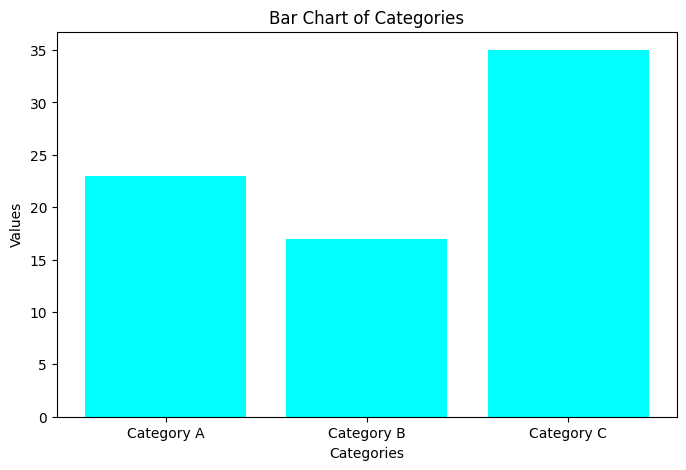

In [9]:
# Exercise 1: Basic Plotting with Matplotlib
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Category A', 'Category B', 'Category C']
values = [23, 17, 35]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='cyan')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Categories')
plt.show()


In [2]:
pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


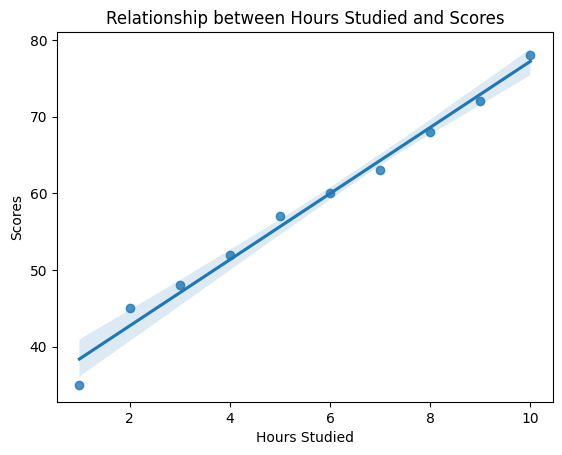

In [12]:
# Exercise 2: Seaborn for Relationship Visualization
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)

# Plot
sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relationship between Hours Studied and Scores')
plt.show()


### Practice Tasks
- Use Matplotlib to create a multi-bar chart to compare data across groups.
- Generate scatter plots with Seaborn to explore relationships between variables in a dataset.
- Customize plot layouts and color schemes.


#### 1. Use Matplotlib to Create a Multi-Bar Chart to Compare Data Across Groups
Untuk tugas pertama ini, kita akan membuat multi-bar chart yang membandingkan beberapa grup dalam dataset.

Contoh: Misalnya, kita memiliki dataset tentang penjualan produk dari beberapa kategori yang berbeda di beberapa bulan. Kita akan membandingkan data penjualan setiap bulan untuk setiap kategori produk.

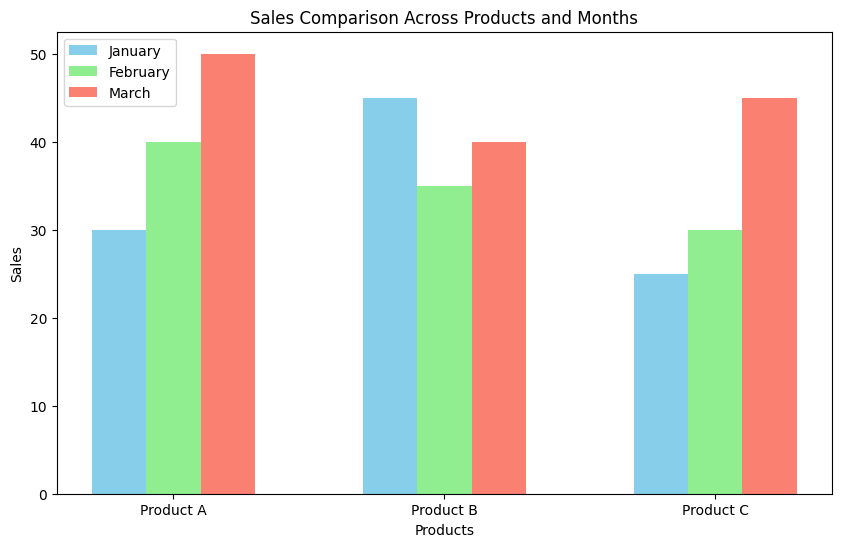

In [13]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['Product A', 'Product B', 'Product C']
sales_jan = [30, 45, 25]
sales_feb = [40, 35, 30]
sales_mar = [50, 40, 45]

x = np.arange(len(categories))

width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, sales_jan, width, label='January', color='skyblue')
bar2 = ax.bar(x, sales_feb, width, label='February', color='lightgreen')
bar3 = ax.bar(x + width, sales_mar, width, label='March', color='salmon')

ax.set_xlabel('Products')
ax.set_ylabel('Sales')
ax.set_title('Sales Comparison Across Products and Months')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()

#### 2. Generate Scatter Plots with Seaborn to Explore Relationships Between Variables in a Dataset
Tugas kedua adalah membuat scatter plot untuk menggali hubungan antara dua variabel dalam dataset. Misalnya, kita akan menganalisis hubungan antara jumlah jam belajar dan skor yang diperoleh.

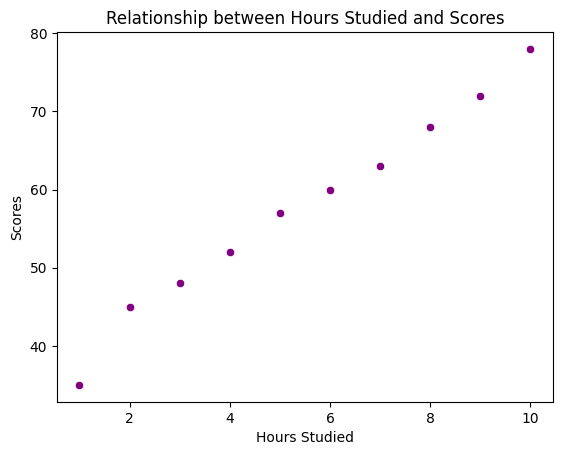

In [14]:
import seaborn as sns
import pandas as pd

data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)

sns.scatterplot(x='Hours Studied', y='Scores', data=df, color='purple', marker='o')
plt.title('Relationship between Hours Studied and Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

#### 3. Customize Plot Layouts and Color Schemes
Penyesuaian tata letak dan skema warna plot adalah langkah penting untuk membuat visualisasi lebih menarik dan jelas. Berikut adalah cara menyesuaikan plot dengan menggunakan Matplotlib dan Seaborn.

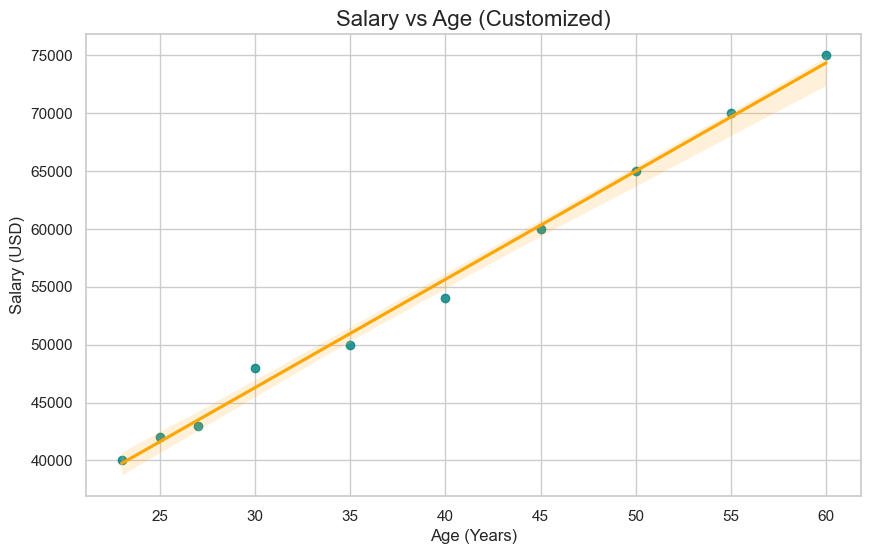

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Age': [23, 25, 27, 30, 35, 40, 45, 50, 55, 60],
    'Salary': [40000, 42000, 43000, 48000, 50000, 54000, 60000, 65000, 70000, 75000]
}
df = pd.DataFrame(data)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Salary', data=df, color='teal', line_kws={'color': 'orange'})
plt.title('Salary vs Age (Customized)', fontsize=16)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.show()

## Homework for Students
- **Pertemuan 12**: Clean a real-world dataset (from Kaggle or another source), perform normalization, handle outliers, and prepare the data for analysis.


Dataset: Saya menggunakan dataset "Titanic - Machine Learning from Disaster" dari Github.

Langkah-langkah:
1. Membaca Dataset dan Menampilkan Statistik Awal
2. Mengidentifikasi dan Menangani Nilai yang Hilang
3. Normalisasi Data Numerik
4. Menangani Outlier

Berikut adalah kode Python-nya:

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

print("Info Dataset:\n", df.info())
print("\nDeskripsi Dataset:\n", df.describe())

missing_values = df.isnull().sum()
print("\nNilai Hilang:\n", missing_values)

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Fare'] >= (Q1 - 1.5 * IQR)) & (df['Fare'] <= (Q3 + 1.5 * IQR))]

print("\nSetelah Pembersihan:")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Info Dataset:
 None

Deskripsi Dataset:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523

C:\Users\User\AppData\Local\Temp\ipykernel_1196\2474968458.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1196\2474968458.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa


- **Pertemuan 13**: Create a dashboard with multiple visualizations to summarize a dataset of your choice.


Untuk menyelesaikan tugas ini, saya membuat beberapa visualisasi menggunakan Matplotlib dan Seaborn untuk menyimpulkan dataset Titanic:
1. Distribusi Penumpang Berdasarkan Jenis Kelamin
2. Distribusi Umur
3. Korelasi Antara Umur dan Tarif
4. Peluang Bertahan Hidup Berdasarkan Kelas

Berikut adalah kode Python-nya:

C:\Users\User\AppData\Local\Temp\ipykernel_1196\4064005963.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='pastel')


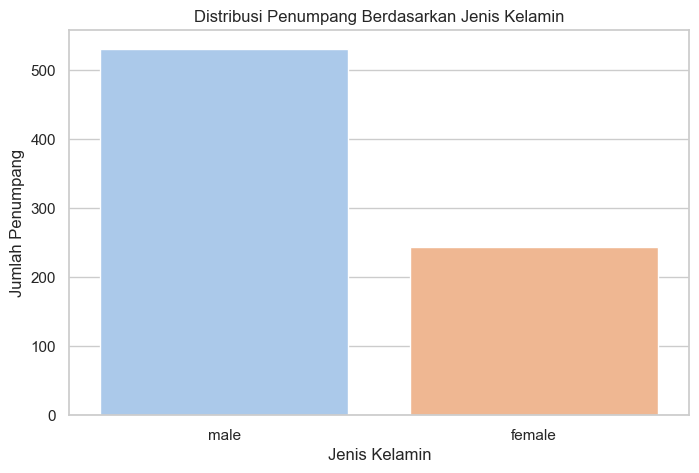

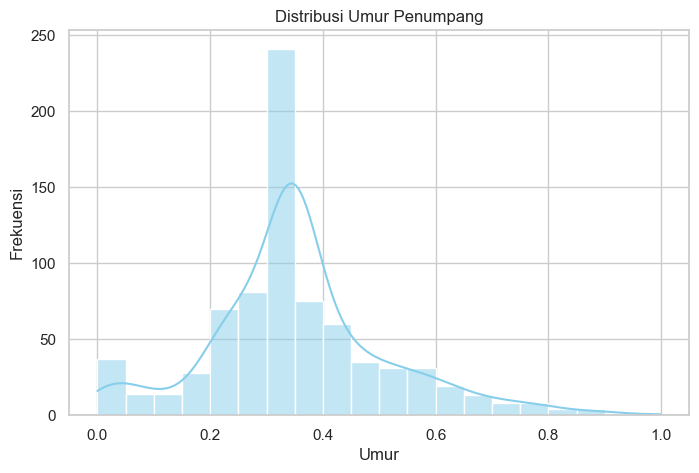

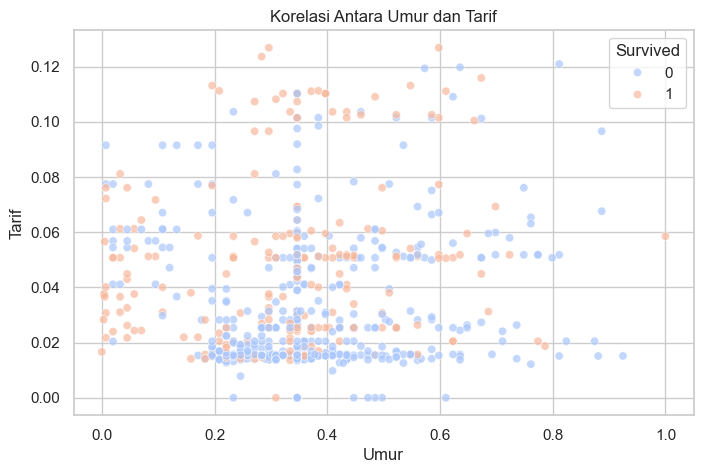

C:\Users\User\AppData\Local\Temp\ipykernel_1196\4064005963.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')


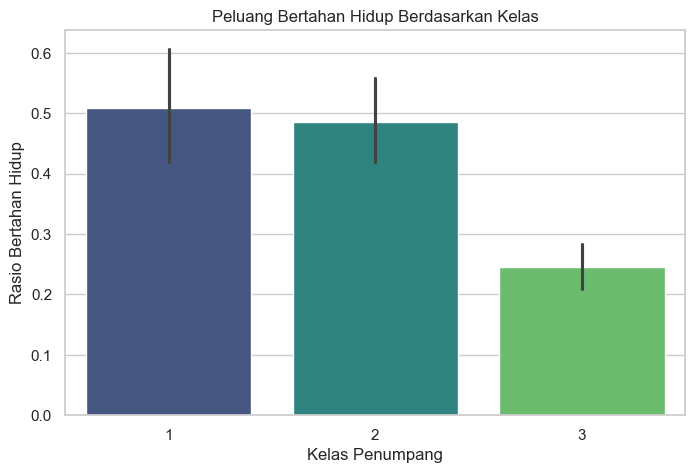

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=df, palette='pastel')
plt.title('Distribusi Penumpang Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Penumpang')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Umur Penumpang')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived', palette='coolwarm', alpha=0.7)
plt.title('Korelasi Antara Umur dan Tarif')
plt.xlabel('Umur')
plt.ylabel('Tarif')
plt.legend(title='Survived', loc='upper right')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')
plt.title('Peluang Bertahan Hidup Berdasarkan Kelas')
plt.xlabel('Kelas Penumpang')
plt.ylabel('Rasio Bertahan Hidup')
plt.show()